#IMPORTING DATASET


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#IMPORTING LIBRARIES


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#DATA PREPROCESSING

##TRAINING IMAGE PREPROCESSING

In [4]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/food project/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


#Validation Image Preprocessing

In [9]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/food project/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [6]:
cnn = tf.keras.models.Sequential()

#Building Convolution Layer

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:

cnn.add(tf.keras.layers.Dropout(0.25))


In [15]:

cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [17]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting


In [19]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [21]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 565s 6s/step - accuracy: 0.0336 - loss: 25.6739 - val_accuracy: 0.0883 - val_loss: 3.4795
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.0475 - loss: 3.4610 - val_accuracy: 0.0912 - val_loss: 3.3899
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.0713 - loss: 3.3205 - val_accuracy: 0.1567 - val_loss: 2.8738
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1019 - loss: 3.1459 - val_accuracy: 0.2735 - val_loss: 2.6843
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1649 - loss: 2.8738 - val_accuracy: 0.4274 - val_loss: 2.2772
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.2306 - loss: 2.6495 - val_accuracy: 0.5442 - val_loss: 1.8910
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.3255 - loss: 2.3444 - val_accuracy: 0.6553 - val_loss: 1.4698
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.4243 - loss: 2.0268 - val_accuracy: 0.7293 - 

#Evaluating Model

In [24]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 87s 860ms/step - accuracy: 0.9812 - loss: 0.0612
Training accuracy: 0.9797753095626831


In [25]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9617 - loss: 0.2142
Validation accuracy: 0.9572649598121643


#Saving Model

In [26]:
cnn.save('trained_model.h5')


In [27]:
training_history.history #Return Dictionary of history

{'accuracy': [0.03852327540516853,
  0.052006419748067856,
  0.08346709609031677,
  0.11235955357551575,
  0.1701444685459137,
  0.24783307313919067,
  0.3316211998462677,
  0.419261634349823,
  0.5277688503265381,
  0.5926163792610168,
  0.6715890765190125,
  0.7322632670402527,
  0.7467094659805298,
  0.7916532754898071,
  0.8227929472923279,
  0.8369181156158447,
  0.8481540679931641,
  0.8796147704124451,
  0.8500802516937256,
  0.8808988928794861,
  0.8895666003227234,
  0.9001604914665222,
  0.9168539047241211,
  0.9197431802749634,
  0.9197431802749634,
  0.9229534268379211,
  0.9447833299636841,
  0.9168539047241211,
  0.9357945322990417,
  0.9502407908439636,
  0.9595505595207214,
  0.9627608060836792],
 'loss': [9.299925804138184,
  3.449867010116577,
  3.2689731121063232,
  3.08796763420105,
  2.842672824859619,
  2.594733953475952,
  2.3043949604034424,
  2.011479616165161,
  1.6068718433380127,
  1.4025297164916992,
  1.124100685119629,
  0.9236496090888977,
  0.8634932041

In [28]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [29]:

print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [30]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


Validation set Accuracy: 95.72649598121643 %


#Calculating Accuracy of Model Achieved on Validation set

In [31]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


Validation set Accuracy: 95.72649598121643 %


#Accuracy Visualization

#Training Visualization

In [32]:
#training_history.history['accuracy']

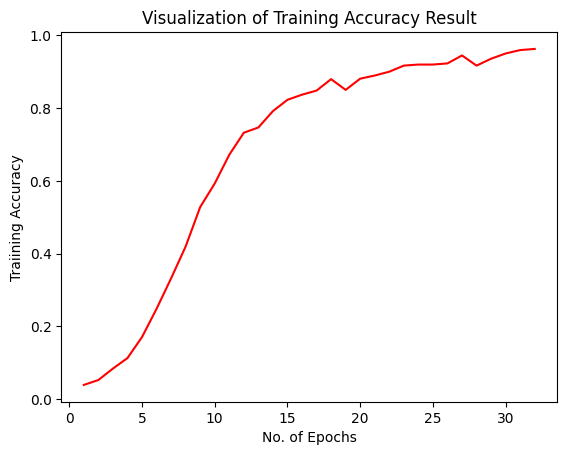

In [33]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

#Validation Accuracy

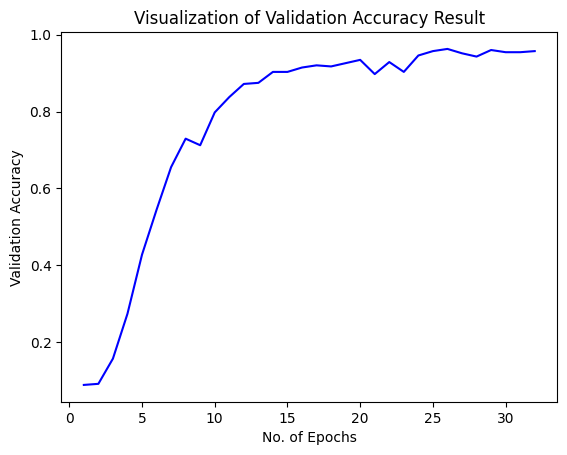

In [34]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

#Test set Evaluation

In [38]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/food project/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [39]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.9670 - loss: 0.3182
Test accuracy: 0.9582172632217407


#Loading Model

In [40]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

#Visualising and Performing Prediction on Single image

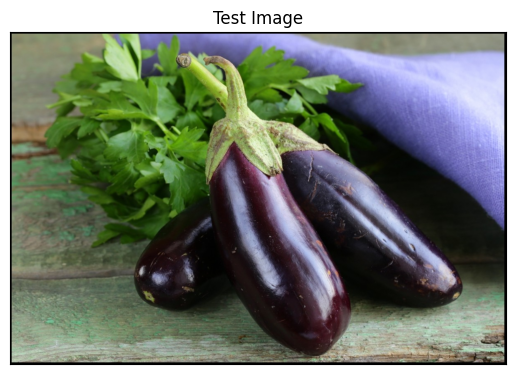

In [62]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/food project/test/eggplant/Image_3.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [63]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [64]:
print(predictions)

[[2.1796619e-25 8.9738070e-21 1.8288973e-24 5.0692126e-20 7.7620399e-20
  2.5413889e-26 7.8280470e-29 3.1335200e-18 1.3906209e-22 1.0905952e-22
  3.8584096e-13 1.0000000e+00 3.5682733e-14 7.7553019e-25 8.4359124e-11
  2.5571226e-19 6.7123353e-28 1.0701097e-36 2.6181660e-24 3.8934107e-26
  7.8399866e-25 6.3556596e-31 1.6410883e-26 1.7915339e-31 4.2264530e-25
  1.9380723e-22 2.4249018e-24 4.3352081e-31 1.4141226e-20 6.2973993e-24
  2.0497863e-22 1.0646266e-26 3.7410790e-30 9.8809761e-30 1.5099908e-19
  7.8004680e-23]]


In [65]:
# test_set.class_names


In [66]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

11


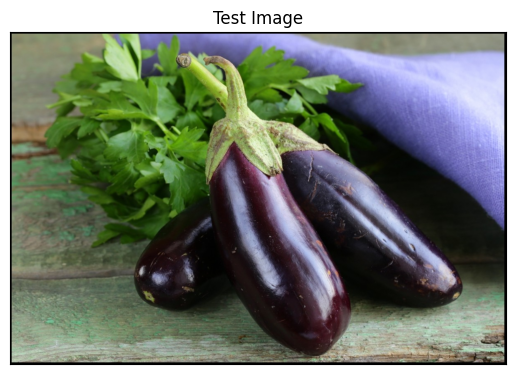

In [67]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [68]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a eggplant
